In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [12]:
# Завантажимо файл і подивимось на вміст
path = r'C:\PythonProject\internet_service_churn.csv'
data = pd.read_csv(path)
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [13]:
# Загальна інформація про склад колонок даних
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [14]:
# Датасет складаеться виключно з числових даних, але в трьох колонках наявні пропуски
# Підрахуємо скільки їх
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [17]:
# Подивимось на загальну статистику датасету
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


C:\Users\asgar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reamining_contract', ylabel='Count'>

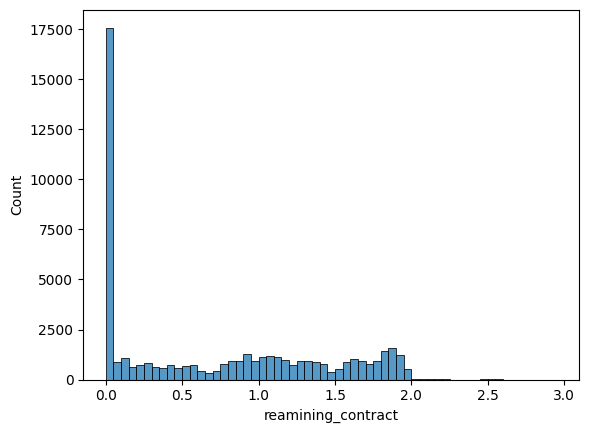

In [16]:
# Тож що робить? дані  в колонках 'download_avg' та 'upload_avg' має сенс просто видалити, вони складають всбого 0,5% датасету
# а дані в 'reamining_contract' складають майже 30% відсотків датасету, їх видалити без рунування цілісності розподілу навояд можливо
# можна зробити припущення (оскількі пояснень значень колонок не мається в ТЗ) що оця кількість це люди які не укладали контракт,
# але подивимось спочатку на розподіл значень
sns.histplot(data["reamining_contract"], bins=50, binwidth=0.05)

In [18]:
# Тож беручи дл=о уваги показники з загальної статистики, то якщо пропущені значеня ми поставимо середніми то отримаємо шалений 30% відсотковий ріст
# майже посередині нашої гістограми, тож припустимо що поставити 0 (що також являє собою min цієї колонки) не буде загального викривлення розподілу.
#  пікове значення в нулі просто стане ще вище.

data = data.fillna({'reamining_contract':data['reamining_contract'].min()}).dropna()
data.isnull().sum(), data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   reamining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.6 MB


(id                             0
 is_tv_subscriber               0
 is_movie_package_subscriber    0
 subscription_age               0
 bill_avg                       0
 reamining_contract             0
 service_failure_count          0
 download_avg                   0
 upload_avg                     0
 download_over_limit            0
 churn                          0
 dtype: int64,
 None)

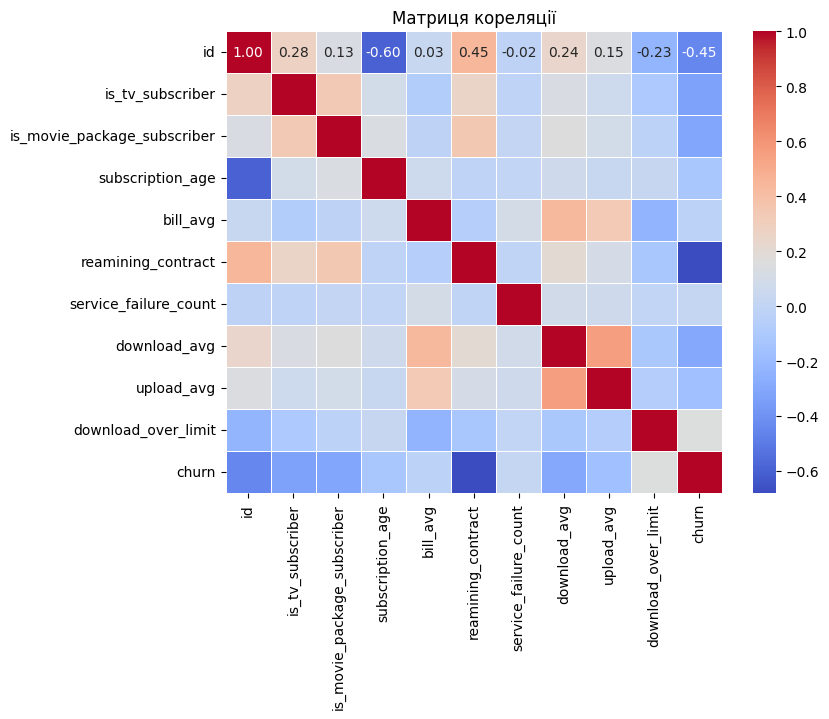

In [29]:
# Тепер Дані пощищені. перейдемо до аналізу ознак і їх взаємозвязків
# Побудуємо спочатку матрицю корреляцій, перед тим як заглибимось в аналіз пар фічів

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True,  fmt='.2f', linewidths=0.5)
plt.title('Матриця кореляції')
plt.show()

In [34]:
# Щож залежність фіч більш менш наочно  видно, подивимось розподіли по ознакам розділяючи їх за нашим таргетом 'churn'
# попередьно подивимось на різницю згрупувавши дані по неї
# також приберомо фічу 'id' це постійно зростаючий лічільник, він нам нідо чого і ні про що не каже.
data = data.iloc[:, 1:]
data.groupby(by='churn').mean()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
churn,,,,,,,,,
0,0.958609,0.496875,2.743422,19.424332,1.006538,0.257608,64.884728,5.983563,0.032001
1,0.701223,0.204619,2.226554,18.692859,0.092976,0.290037,26.838312,2.767698,0.349213


In [40]:
# кількісний розподіл кліентів
data['churn'].value_counts()
# ті хто пішли переважають вагомо

churn
1    40050
0    31843
Name: count, dtype: int64

Text(0.5, 1.0, 'Підпіска на ТВ')

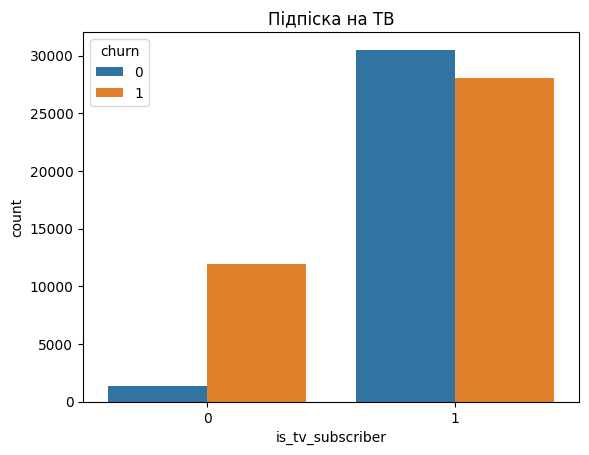

In [45]:
# одразу можна побачити що 'reamining_contract' мабуть буде гашою головною фічей, майже нема відтоку там де його подовжують
# щож подивимось на графіках
sns.countplot(data=data, x="is_tv_subscriber", hue="churn")
plt.title("Підпіска на ТВ")

Text(0.5, 1.0, 'Підпіска на Фільми')

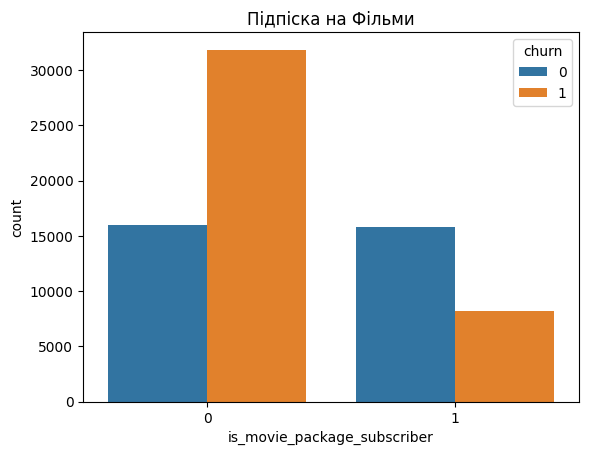

In [47]:
# З графіка бачимо що майже ооднакова кількість підпіснив ТВ пішла і лишилась. з іншого боку не не кліентів які пішли і немали підписку значно більше.
# тож виоргідність що клієнт який не має підписки піде більше. подивимось чи так з 'movie_package_subscriber'

sns.countplot(data=data, x="is_movie_package_subscriber",  hue="churn")
plt.title("Підпіска на Фільми")

In [41]:
# подивимось розподіл загально для підпісників
data.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].agg(['sum'])
# наочно бачимо що клієнти що мають обидві підписки менш схільні піти. клєнти без підписок або ти хто дивится ТВ більш схильні змінити нашого замовника.


churn
                                                sum
is_tv_subscriber is_movie_package_subscriber       
0                0                            11964
                 1                                2
1                0                            19891
                 1                             8193

C:\Users\asgar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Розподіл кількості клієнтів за віком')

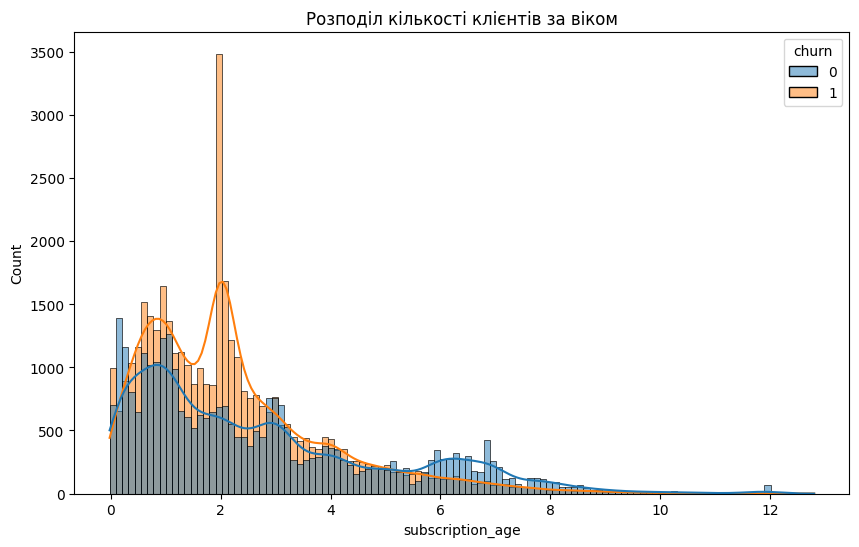

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="subscription_age", kde=True, hue="churn")
plt.title("Розподіл кількості клієнтів за віком")
# Як бачимо на віддтінку від 0 до пів року більшість все таки лишаеться на сервісі, а от потім до відмітки в 4 року люди такі схілні піти.
# тиж хто перетнув цю межу 5 років більш схильні залишатися й надалі.

Text(0.5, 1.0, 'Розподіл кількості клієнтів за віком')

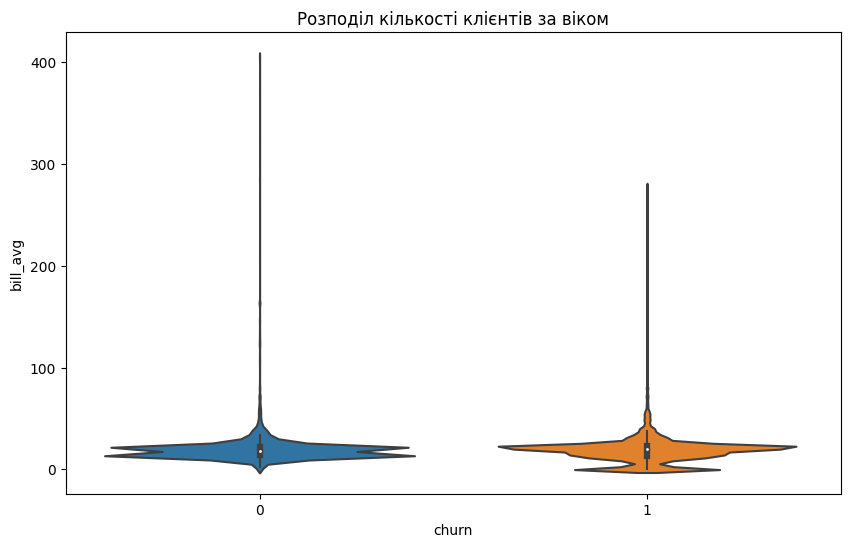

In [60]:
# в даному випадку дані дуже розтягнуті і гістограмма не дає нам адекватної уяви.тож побудуємо діаграму розподілу даних
# як бвчимо і цілому середній чек не дуже впливає, хоча ті хто платить трохи більше все ж менш схильні піти.
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y="bill_avg", x="churn")
plt.title("кількості клієнтів за середнім чеком")

C:\Users\asgar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Підпіска на Фільми')

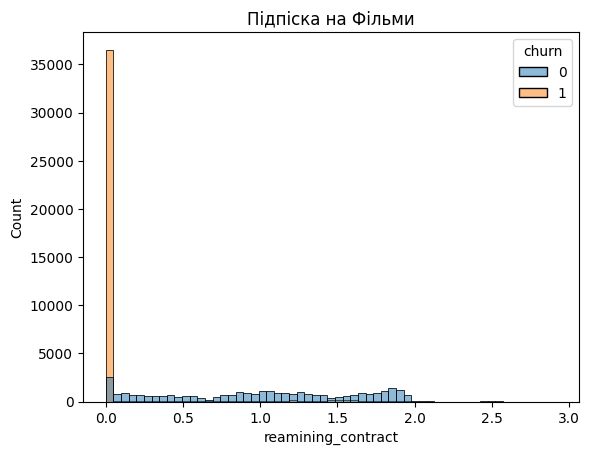

In [63]:
# подивимось на залежність контракту 
sns.histplot(data=data, x="reamining_contract",  hue="churn")
plt.title("Подовження контракту")

Text(0.5, 1.0, 'кількості клієнтів за середнім чеком')

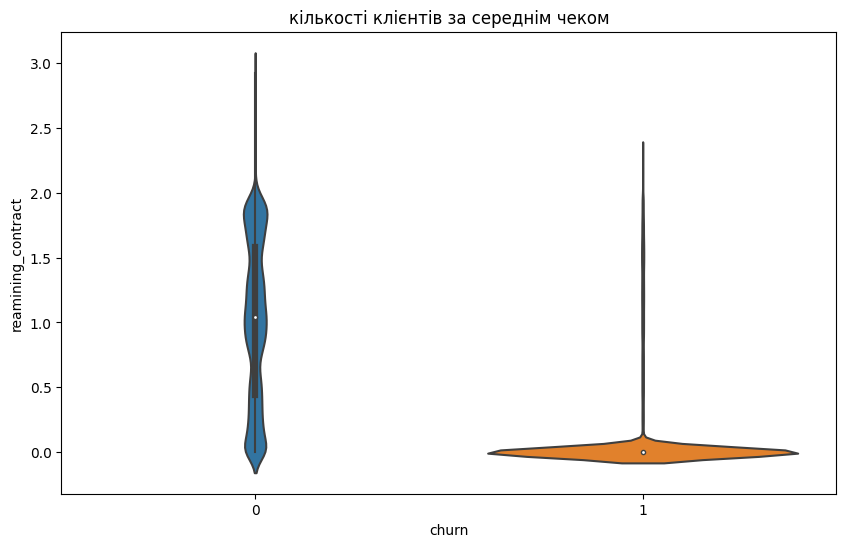

In [64]:
# як бачимо клієнти які не мають контракт ідуть в своїй більшості, є не значна кількість і тих хто єде з контракту. роздтвимось їх розподіл на наступній діграмі
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y="reamining_contract", x="churn")
plt.title("кількості клієнтів за середнім чеком")

Text(0.5, 1.0, 'Подовження контракту')

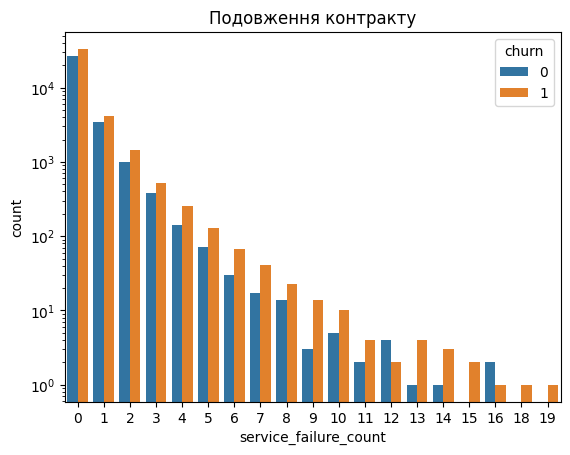

In [69]:
# подивимось на залежність "service_failure_count" 
sns.countplot(data=data, x="service_failure_count", log=True,  hue="churn")
plt.title("Кількість скарг на якість обслуговування")
# Дивлячись на на це в відностній логаріфмічній шкалі бачимо, що проблеми  з надання послуг не те щоб впливовий фактор, різниця майже постійна.
# хоча зі зростанням кількості скарг, це таки стає фактором

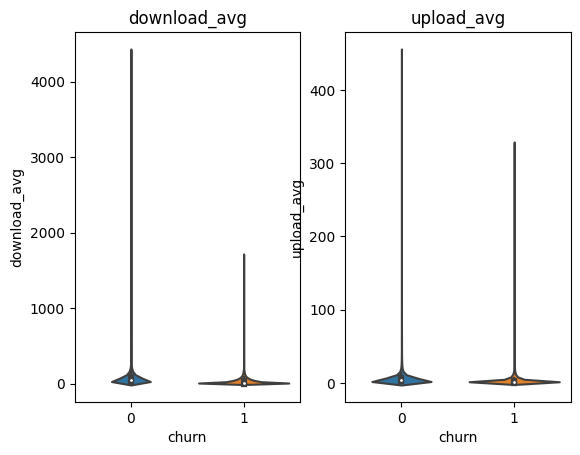

In [79]:
# Подивимось на ознаки "download_avg" та "upload_avg"
plt.subplot(1, 2, 1)
plt.title("download_avg")
sns.violinplot(data=data, y="download_avg", x="churn")
plt.subplot(1, 2, 2)
plt.title("upload_avg")
sns.violinplot(data=data, y="upload_avg", x="churn")
plt.show()
# як бачимо ці ознаки не мають суттевого впливу

<Axes: title={'center': 'download_over_limit'}, xlabel='churn', ylabel='download_over_limit'>

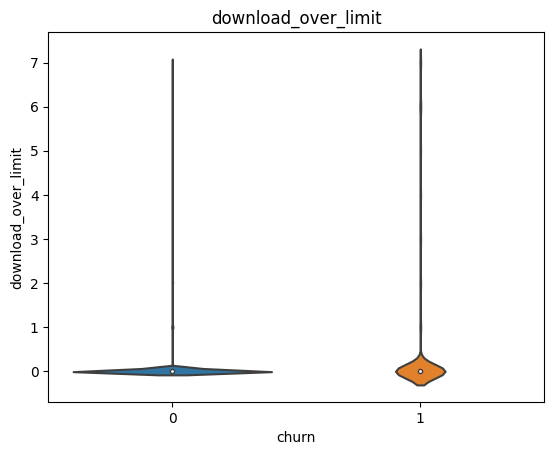

In [80]:
# як бачимо ознака "download_over_limit" може мати невеликий вплив.
plt.title("download_over_limit")
sns.violinplot(data=data, y="download_over_limit", x="churn")